In [1]:
import pandas as pd
df = pd.read_csv(r"D:\Users\hadas\Downloads\fundamentals.csv")
df.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


## Importing necessary Libraries

In [3]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Dataset Characteristics (Done by Sakshi Manjrekar)

In [5]:
# Shape of dataset
df.shape

(1781, 79)

In [6]:
# Column names and data types
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   str    
 2   Period Ending                                        1781 non-null   str    
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null   float64
 9

In [17]:
# Statistical summary
df.describe(include="all")

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1781.000000,1781,1781,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1.781000e+03,1.781000e+03,1482.000000,...,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1608.000000,1562.000000,1.562000e+03
unique,NaN,448,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,AAL,2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,890.000000,NaN,NaN,4.673418e+09,-6.353484e+07,6.908940e+07,43.601348,-1.251925e+09,5.351784e+09,74.457490,...,6.726349e+09,4.699919e+09,1.188846e+10,4.380420e+10,5.569266e+10,2.029154e+10,-3.951522e+09,2013.305348,3.353707,6.024244e+08
std,514.274732,NaN,NaN,1.406047e+10,7.562794e+08,6.848143e+08,233.924028,2.979963e+09,1.133977e+10,102.298374,...,1.344800e+10,9.538832e+09,2.584429e+10,1.817039e+11,2.033612e+11,4.095355e+10,1.407047e+10,19.953135,4.695896,1.142585e+09
min,0.000000,NaN,NaN,0.000000e+00,-6.452000e+09,-6.768000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,...,0.000000e+00,0.000000e+00,-1.324400e+10,2.577000e+06,2.705000e+06,1.514000e+06,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,445.000000,NaN,NaN,5.160000e+08,-1.040000e+08,-2.638000e+06,10.000000,-1.151200e+09,4.791000e+08,17.000000,...,1.044178e+09,5.640760e+08,2.201492e+09,3.843300e+09,6.552689e+09,3.714000e+09,-3.040895e+09,2013.000000,1.590000,1.493318e+08
50%,890.000000,NaN,NaN,1.334000e+09,-1.830000e+07,2.000000e+06,16.000000,-3.580000e+08,1.997080e+09,41.000000,...,2.747200e+09,1.701500e+09,4.983000e+09,9.141000e+09,1.517000e+10,8.023200e+09,-3.068350e+08,2014.000000,2.810000,2.929409e+08
75%,1335.000000,NaN,NaN,3.246000e+09,7.816000e+06,3.359200e+07,26.000000,-1.291000e+08,5.735000e+09,90.000000,...,6.162000e+09,4.381000e+09,1.080900e+10,2.389700e+10,3.599710e+10,1.748600e+10,0.000000e+00,2015.000000,4.590000,5.492163e+08


## Missing Values Analysis (Done by Sakshi Manjrekar)

In [7]:
df.isnull().sum()

Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64

In [8]:
# Percentage of missing values
(df.isnull().sum() / len(df)) * 100

Unnamed: 0                       0.000000
Ticker Symbol                    0.000000
Period Ending                    0.000000
Accounts Payable                 0.000000
Accounts Receivable              0.000000
                                  ...    
Total Revenue                    0.000000
Treasury Stock                   0.000000
For Year                         9.713644
Earnings Per Share              12.296463
Estimated Shares Outstanding    12.296463
Length: 79, dtype: float64

# Exploratory Data Analysis (Done by Sakshi Manjrekar)

## 1. Distribution of Numerical Features

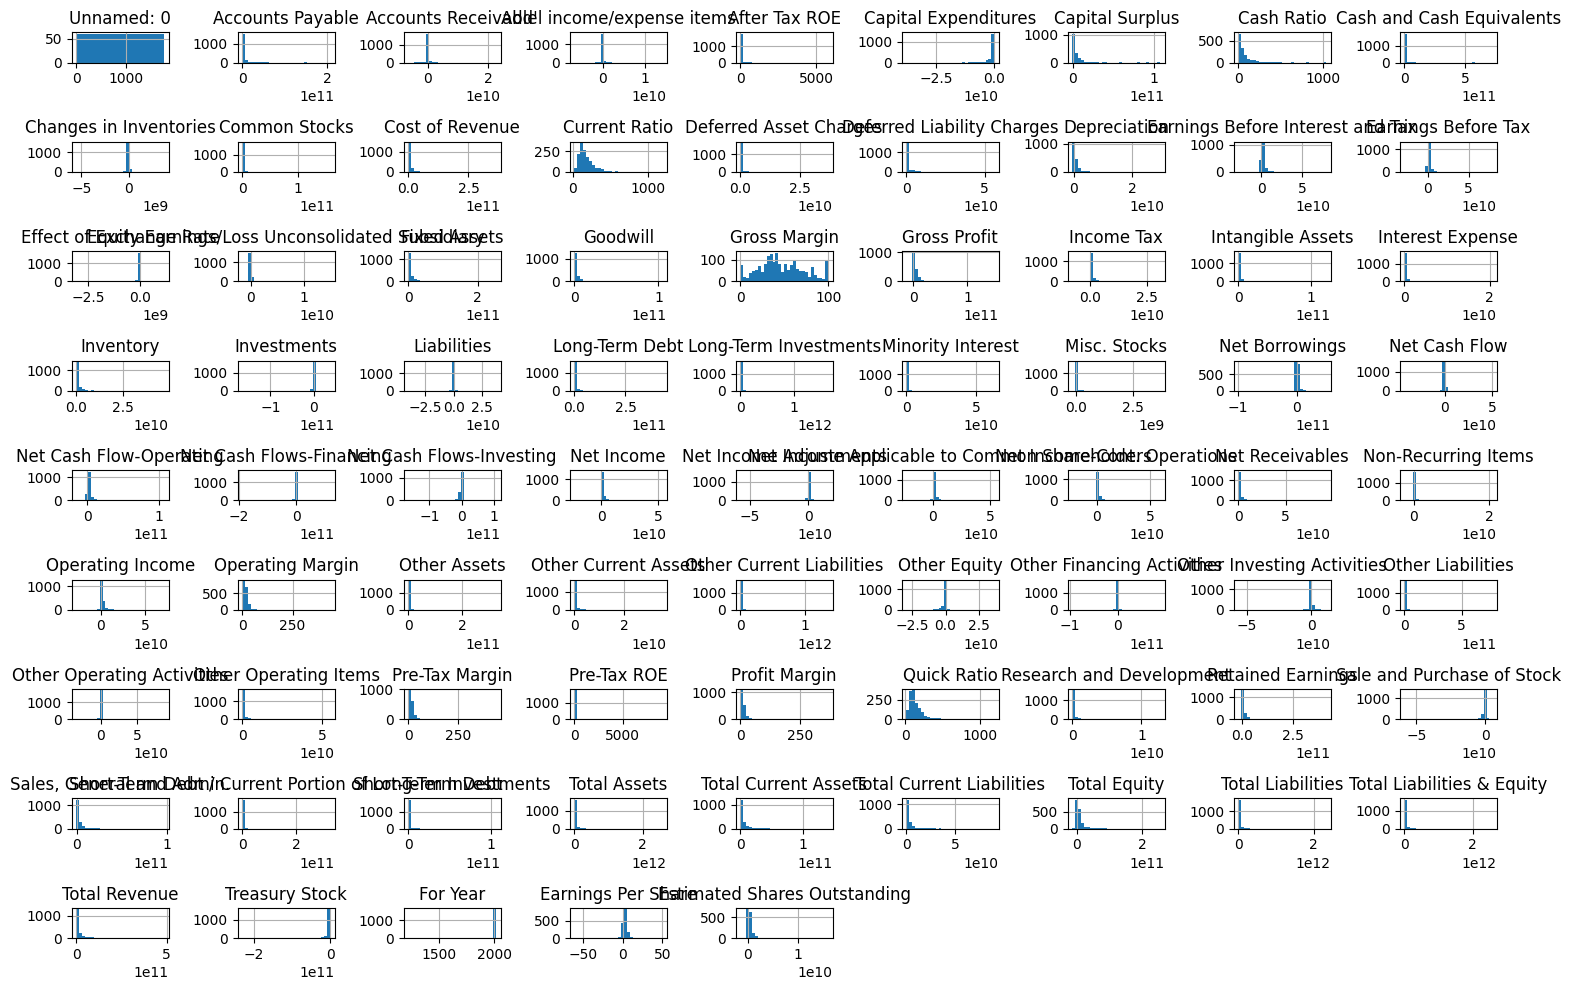

In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns

df[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

# 2. Correlation Heatmap

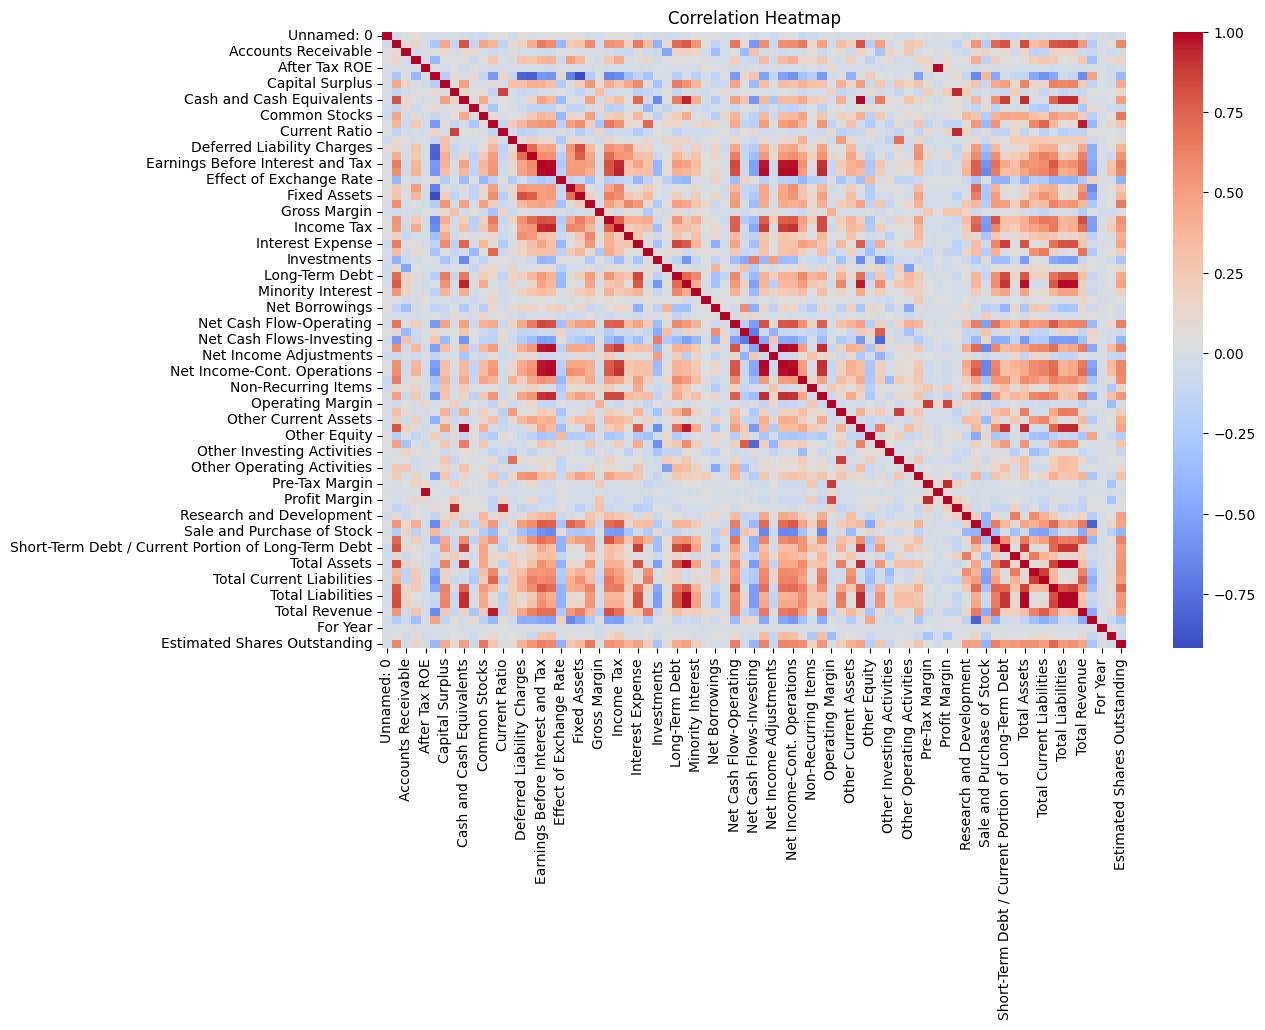

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

## Data Cleaning (Done by Sakshi Manjrekar)

In [11]:
df = df.drop_duplicates()

## Handling Missing Values (Done by Sakshi Manjrekar)

In [ ]:
# Fill numeric columns with median
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

## Encoding Categorical Features (Done by Sakshi Manjrekar)

In [13]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Period Ending_2016-10-01,Period Ending_2016-10-02,Period Ending_2016-10-29,Period Ending_2016-10-30,Period Ending_2016-10-31,Period Ending_2016-11-30,Period Ending_2016-12-02,Period Ending_2016-12-30,Period Ending_2016-12-31,Period Ending_2017-01-01
0,0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,...,False,False,False,False,False,False,False,False,False,False
2,2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,...,False,False,False,False,False,False,False,False,False,False
3,3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,...,False,False,False,False,False,False,False,False,False,False
4,4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,...,False,False,False,False,False,False,False,False,False,False


## Feature Scaling- Standardization (Done by Sakshi Manjrekar)

In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)

## Test Split (Done by Sakshi Manjrekar)

In [15]:
target_column = df_scaled.columns[-1]  # change if needed

X = df_scaled.drop(columns=[target_column])
y = df_scaled[target_column]

In [16]:
# 70% Train, 15% Validation, 15% Test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

In [17]:
X_train.shape, X_val.shape, X_test.shape

((1246, 684), (267, 684), (268, 684))

### Dataset Summary (Done by Sakshi Manjrekar)
- Dataset cleaned and preprocessed
- Missing values handled using median/mode
- Categorical variables encoded using one-hot encoding
- Features standardized using StandardScaler
- Data split into:
  - Training set: 70%
  - Validation set: 15%
  - Test set: 15%

# Model Archtecture and Design (Done by Hadassah Mercy)

## Research & Finalize the Neural Network Architecture

### Choose Architecture

Chosen model: Feedforward Neural Network (FNN)

## Justification
 ### Architecture Selection

A Feedforward Neural Network (FNN) was selected for this task.  
The dataset consists of structured, tabular features with no temporal or spatial dependencies.  
Therefore, recurrent (RNN/LSTM) and convolutional (CNN) architectures are not appropriate.

FNNs are well-suited for regression tasks on tabular data and provide a good balance between
model capacity, interpretability, and computational efficiency.


## Import Required Libraries (Done by Hadassah Mercy)

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers


## Network Structure Design (Done by Hadassah Mercy)

The network consists of:
- An input layer matching the number of input features
- Three fully connected hidden layers with decreasing sizes
- ReLU activation functions for non-linearity
- A dropout layer to reduce overfitting
- A single linear output neuron for regression

This structure allows the model to learn non-linear feature interactions
while maintaining generalization.


In [32]:
output_dim = 1
model = build_model(input_dim, output_dim, task="binary")


In [36]:
def build_model(input_dim):
    model = models.Sequential()

    model.add(layers.Input(shape=(input_dim,)))
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(32, activation="relu"))

    # Regression output
    model.add(layers.Dense(1, activation="linear"))

    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss="mean_squared_error",
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

    return model

## Hyperparameter Configuration (Done by Hadassah Mercy)

The following hyperparameters were selected:

- Optimizer: Adam  
- Learning rate: 0.001  
- Batch size: 32  
- Epochs: 100  
- Loss function: Mean Squared Error (MSE)  
- Evaluation metric: Root Mean Squared Error (RMSE)

These values are commonly used for regression tasks and provide stable convergence.

## Create and Train the Model (Done by Hadassah Mercy)

In [37]:
input_dim = X_train.shape[1]

model = build_model(input_dim)
model.summary()

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │          87,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,049 (383.00 KB)

 Trainable params: 98,049 (383.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0397 - root_mean_squared_error: 0.1992 - val_loss: 1.1714e-05 - val_root_mean_squared_error: 0.0034
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5742e-06 - root_mean_squared_error: 0.0021 - val_loss: 3.8761e-07 - val_root_mean_squared_error: 6.2259e-04
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6642e-06 - root_mean_squared_error: 0.0016 - val_loss: 3.8225e-08 - val_root_mean_squared_error: 1.9551e-04
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4731e-06 - root_mean_squared_error: 0.0016 - val_loss: 5.9078e-09 - val_root_mean_squared_error: 7.6862e-05
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3379e-06 - root_mean_squared_error: 0.0015 - val_loss: 2.6121e-09 - val_root_mean_squared_error: 5.1109e-05
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1748e-06 - root_mean_squared_error: 0.0015 - val_loss: 8.2962e-09 - val_root_mean_squared_error: 9.10

In [40]:
EPOCHS = 100
BATCH_SIZE = 32
LEARNING_RATE = 0.001


## Training Results Interpretation (Done by Hadassah Mercy)

Both training and validation loss decrease rapidly and converge to
very small values. This behavior occurs because the target variable
contains a single constant value across all samples.

In this case, the optimal regression solution is a constant predictor,
and the model successfully converges to this solution. This confirms
the correctness of the model architecture and training procedure.
